<a href="https://colab.research.google.com/github/mjaliz/tfztm/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural netwoks for classification problems.

A classification problem is where you try to classify as one thing or another thing.

A few types of classification problems:
* Binary classification
* Muliticlass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


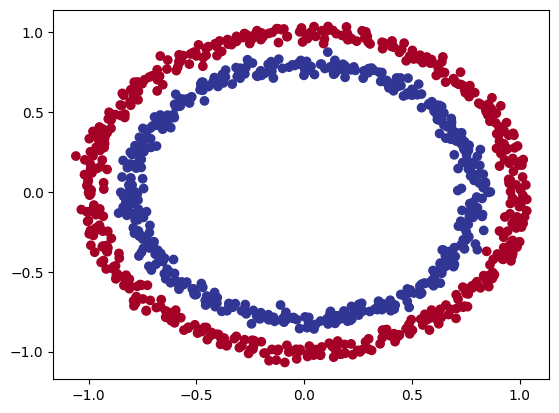

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [9]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 3.3013 - accuracy: 0.4680
Epoch 2/5
32/32 [==============================] - 0s 839us/step - loss: 0.7379 - accuracy: 0.4730
Epoch 3/5
32/32 [==============================] - 0s 839us/step - loss: 0.7033 - accuracy: 0.4820
Epoch 4/5
32/32 [==============================] - 0s 968us/step - loss: 0.6965 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 839us/step - loss: 0.6950 - accuracy: 0.4880


In [11]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 806us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing. So let's step thins up a notch and add and extra layer.

In [12]:
# Set the rando seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 774us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933002471923828, 0.5]

In [14]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

## Improve our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer epochs)

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 903us/step - loss: 0.6940 - accuracy: 0.5000


[0.6939831376075745, 0.5]

To visualize our model's predictions, let's crate a function `plot_decision_boundry`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model prediction on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them reaady for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 696us/step
doing multiclass classification


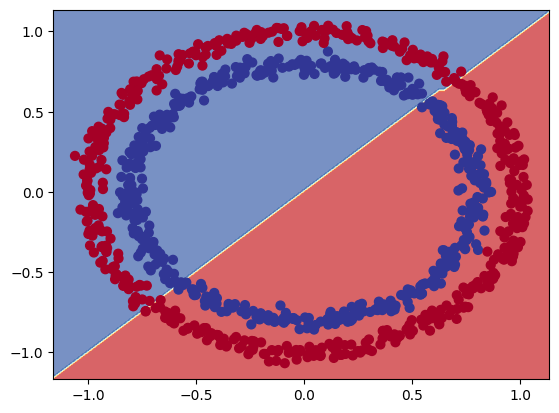

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(model_3,
                       X,
                       y)

In [19]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: -6908.8149 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: -7145.6040 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: -7157.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

Oh wait... we compiled our model for a binary classification problem.
But... we're now working on a regression problem, let's change the model to suit our data.

In [20]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 306.1370 - mae: 306.1370
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 262.1036 - mae: 262.1036
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 262.9809 - mae: 262.9809
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 258.5981 - mae: 258.5981
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 257.5929 - mae: 257.5929
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 257.7872 - mae: 257.7872
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 254.8295 - mae: 254.8295
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 253.4280 - mae: 253.4280
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 258.7534 - mae: 258.7534
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 257.3243 - mae: 257.3243
Epoch 11/100
5/5 [=====================

2/2 [==============================] - 0s 3ms/step


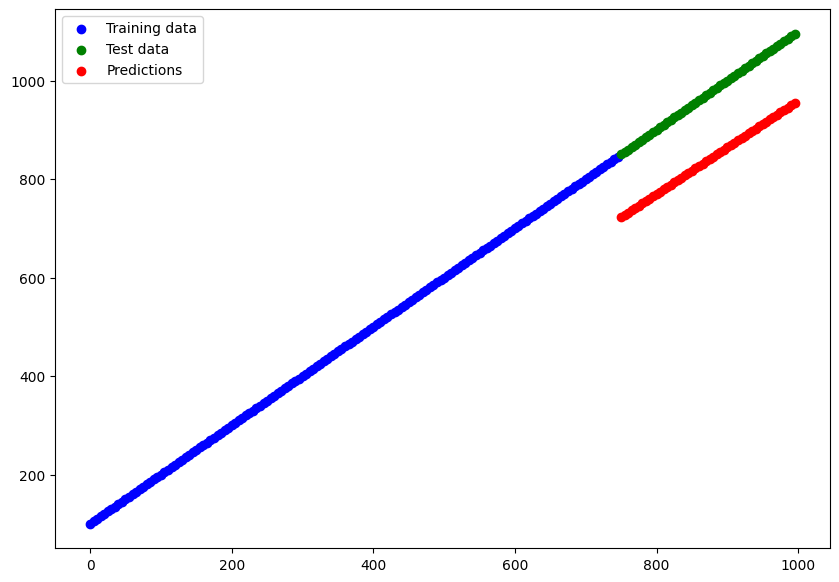

In [21]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [22]:
# Set random seed
tf.random.set_seed(42)

# 1. Crete the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 935us/step - loss: 4.4068 - accuracy: 0.4730
Epoch 2/100
32/32 [==============================] - 0s 806us/step - loss: 4.3863 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 806us/step - loss: 4.3229 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 839us/step - loss: 4.2829 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 806us/step - loss: 4.2199 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 806us/step - loss: 4.1886 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 839us/step - loss: 4.1785 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 839us/step - loss: 4.1403 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 806us/step - loss: 4.1020 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 806us/step - loss: 4.0649 - accura

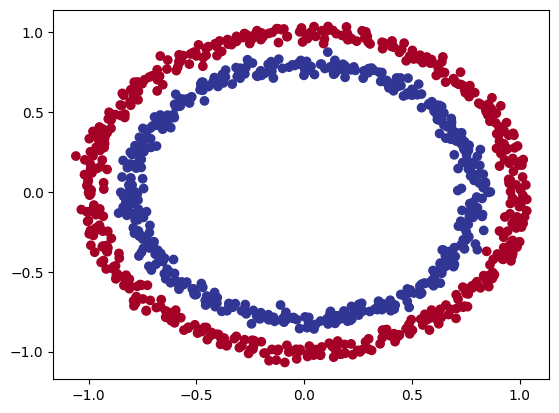

In [23]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 625us/step
doing binary classification


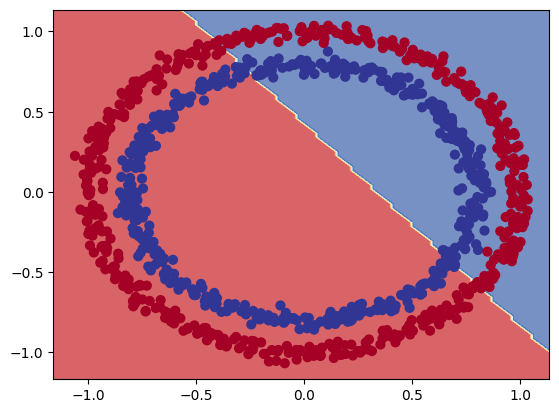

In [24]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4,
                       X, y)

Let's try build our first neural network with non-linear activation function

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 998us/step - loss: 6.4397 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 871us/step - loss: 6.3959 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 871us/step - loss: 6.3795 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3659 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 871us/step - loss: 6.3630 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 903us/step - loss: 6.3619 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 871us/step - loss: 6.3604 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 839us/step - loss: 6.3597 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 806us/step - loss: 6.3580 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 806us/step - loss: 6.3570 - accuracy

In [26]:
# Time to replicate the multi-layer neural network form TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 5.0623 - accuracy: 0.4880
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 4.0126 - accuracy: 0.4030
Epoch 3/250
32/32 [==============================] - 0s 935us/step - loss: 3.7299 - accuracy: 0.4070
Epoch 4/250
32/32 [==============================] - 0s 871us/step - loss: 3.5392 - accuracy: 0.4490
Epoch 5/250
32/32 [==============================] - 0s 903us/step - loss: 3.4475 - accuracy: 0.4640
Epoch 6/250
32/32 [==============================] - 0s 5ms/step - loss: 3.4237 - accuracy: 0.4690
Epoch 7/250
32/32 [==============================] - 0s 935us/step - loss: 3.4024 - accuracy: 0.4700
Epoch 8/250
32/32 [==============================] - 0s 903us/step - loss: 3.3233 - accuracy: 0.4750
Epoch 9/250
32/32 [==============================] - 0s 903us/step - loss: 3.1528 - accuracy: 0.4850
Epoch 10/250
32/32 [==============================] - 0s 871us/step - loss: 3.0616 - accuracy: 0.

In [27]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 871us/step - loss: 0.2735 - accuracy: 0.9440


[0.27346253395080566, 0.9440000057220459]

313/313 [==============================] - 0s 731us/step
doing binary classification


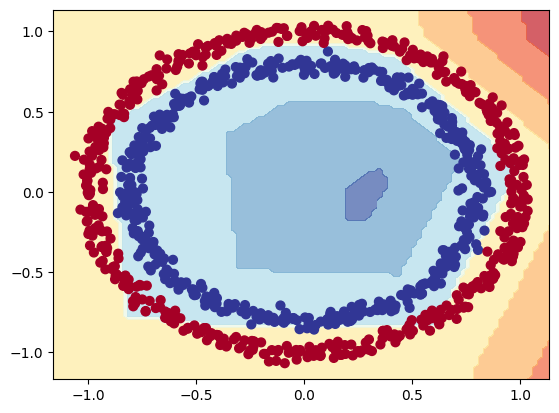

In [28]:
# Hoe do our model predictions look?
plot_decision_boundary(model_6, X,y)

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y , epochs=2500)

Epoch 1/2500
32/32 [==============================] - 1s 1ms/step - loss: 0.7241 - accuracy: 0.5010
Epoch 2/2500
32/32 [==============================] - 0s 1ms/step - loss: 0.7120 - accuracy: 0.4830
Epoch 3/2500
32/32 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.4770
Epoch 4/2500
32/32 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.4490
Epoch 5/2500
32/32 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.4820
Epoch 6/2500
32/32 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.4790
Epoch 7/2500
32/32 [==============================] - 0s 968us/step - loss: 0.6970 - accuracy: 0.4790
Epoch 8/2500
32/32 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.4730
Epoch 9/2500
32/32 [==============================] - 0s 935us/step - loss: 0.6959 - accuracy: 0.4650
Epoch 10/2500
32/32 [==============================] - 0s 871us/step - loss: 0.6954 - accuracy: 

In [30]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 807us/step - loss: 0.0104 - accuracy: 0.9970


[0.01041445042937994, 0.996999979019165]

313/313 [==============================] - 0s 631us/step
doing binary classification


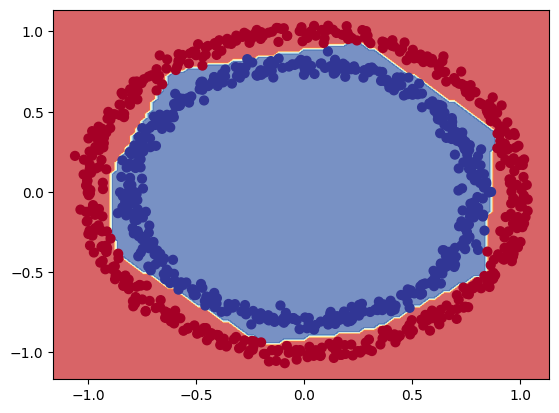

In [31]:
plot_decision_boundary(model_7, X, y)

In [32]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

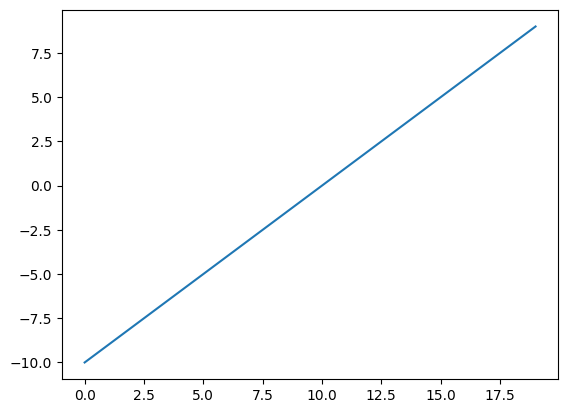

In [33]:
# Visualize our toy tensor
plt.plot(A);

In [34]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

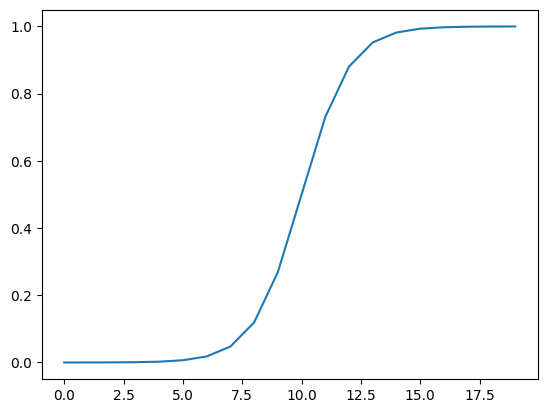

In [35]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [36]:
# Let's recreate relu function
def relu(x):
    return tf.maximum(x, 0)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

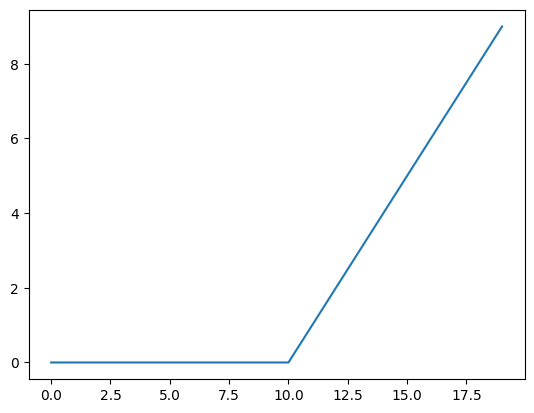

In [37]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [38]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

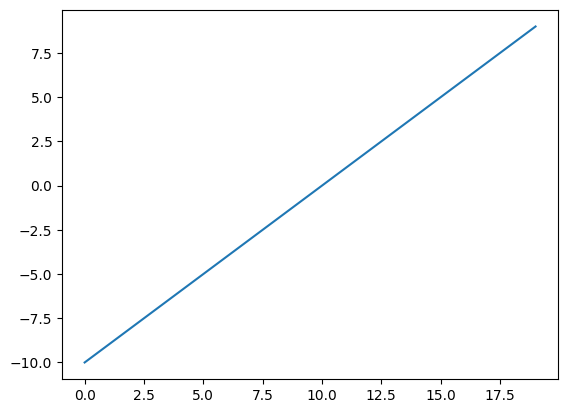

In [39]:
plt.plot(tf.keras.activations.linear(A));

In [40]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...
However, in machine learning this is basically a sin.
So let's crate training and test

In [41]:
# Split to train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [42]:
# Let's recrate a model to fit on the training data and evaluate on the test data
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.6980 - accuracy: 0.4913
Epoch 2/25
25/25 [==============================] - 0s 875us/step - loss: 0.6939 - accuracy: 0.4787
Epoch 3/25
25/25 [==============================] - 0s 875us/step - loss: 0.6906 - accuracy: 0.4950
Epoch 4/25
25/25 [==============================] - 0s 870us/step - loss: 0.6886 - accuracy: 0.5225
Epoch 5/25
25/25 [==============================] - 0s 875us/step - loss: 0.6868 - accuracy: 0.5275
Epoch 6/25
25/25 [==============================] - 0s 875us/step - loss: 0.6837 - accuracy: 0.5350
Epoch 7/25
25/25 [==============================] - 0s 875us/step - loss: 0.6750 - accuracy: 0.5587
Epoch 8/25
25/25 [==============================] - 0s 913us/step - loss: 0.6642 - accuracy: 0.5975
Epoch 9/25
25/25 [==============================] - 0s 875us/step - loss: 0.6509 - accuracy: 0.6100
Epoch 10/25
25/25 [==============================] - 0s 875us/step - loss: 0.6313 - accuracy: 0.6837
E

In [43]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1000us/step - loss: 0.3150 - accuracy: 0.9000


[0.3149983286857605, 0.8999999761581421]

313/313 [==============================] - 0s 811us/step
doing binary classification
313/313 [==============================] - 0s 680us/step
doing binary classification


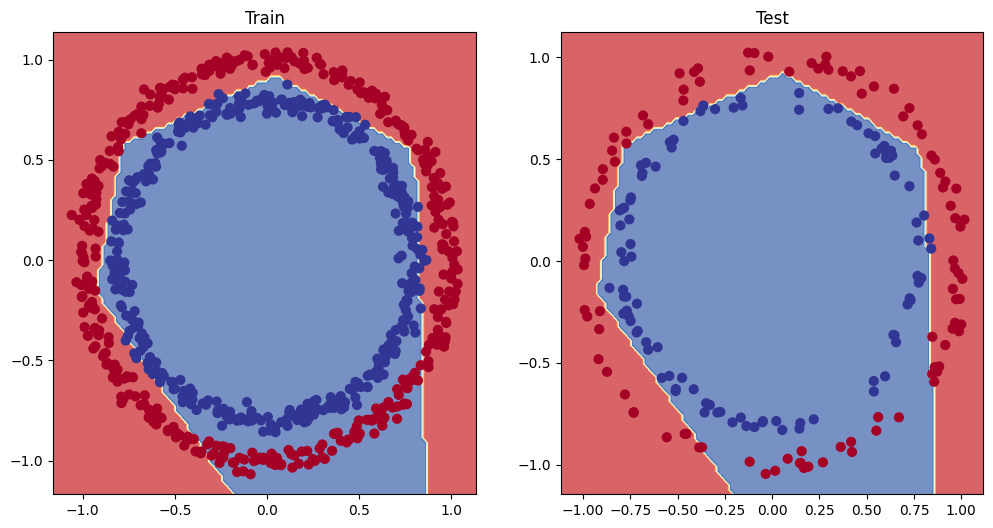

In [44]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

## Plot the loss (or training) curve

In [47]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.697981,0.49125
1,0.693886,0.47875
2,0.690552,0.49500
3,0.688564,0.52250
4,0.686790,0.52750
5,0.683708,0.53500
6,0.674962,0.55875
7,0.664154,0.59750
8,0.650931,0.61000
9,0.631318,0.68375


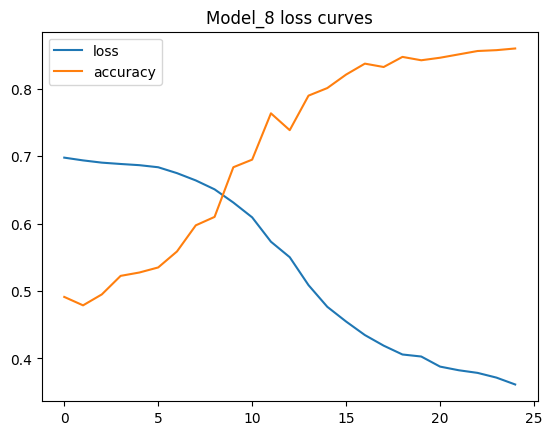

In [48]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

 ## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model while its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curve plot.

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_9 = model_9.fit(X_train, 
                        y_train, 
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.4925 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 958us/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 958us/step - loss: 0.6928 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 875us/step - loss: 0.6923 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 917us/step - loss: 0.6920 - accuracy: 0.5150 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 917us/step - loss: 0.6917 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 958us/step - loss: 0.6914 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 875u

<Axes: xlabel='epochs'>

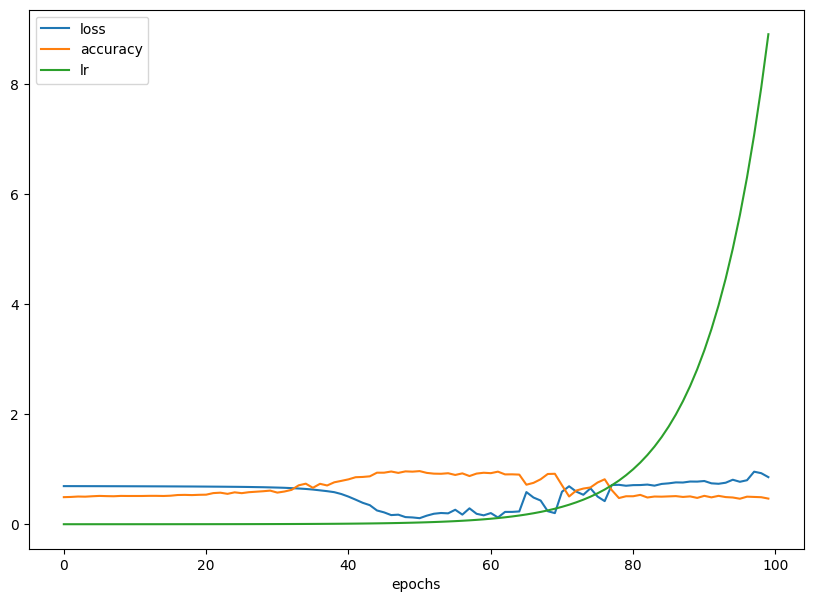

In [51]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

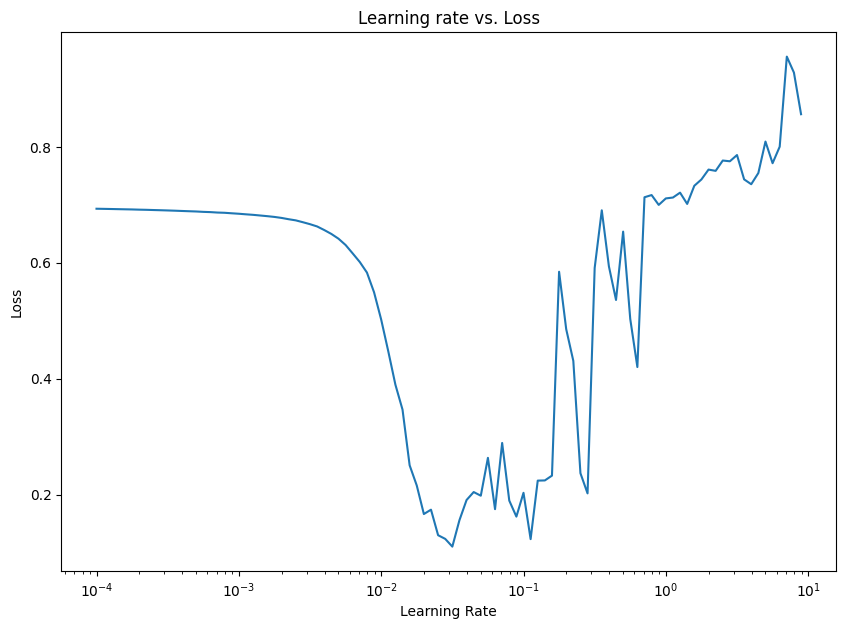

In [54]:
# Plot the learning rate versus the loss
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [55]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [59]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6825 - accuracy: 0.5775
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.6225
Epoch 3/20
25/25 [==============================] - 0s 1000us/step - loss: 0.6284 - accuracy: 0.6800
Epoch 4/20
25/25 [==============================] - 0s 1000us/step - loss: 0.5699 - accuracy: 0.8087
Epoch 5/20
25/25 [==============================] - 0s 917us/step - loss: 0.5061 - accuracy: 0.7750
Epoch 6/20
25/25 [==============================] - 0s 958us/step - loss: 0.4154 - accuracy: 0.8725
Epoch 7/20
25/25 [==============================] - 0s 875us/step - loss: 0.3592 - accuracy: 0.8950
Epoch 8/20
25/25 [==============================] - 0s 958us/step - loss: 0.2842 - accuracy: 0.9362
Epoch 9/20
25/25 [==============================] - 0s 958us/step - loss: 0.2187 - accuracy: 0.9675
Epoch 10/20
25/25 [==============================] - 0s 958us/step - loss: 0.1751 - accuracy: 0.9800
E

In [60]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9800


[0.06556978076696396, 0.9800000190734863]

In [61]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.9000


[0.3149983286857605, 0.8999999761581421]

313/313 [==============================] - 0s 907us/step
doing binary classification
313/313 [==============================] - 0s 721us/step
doing binary classification


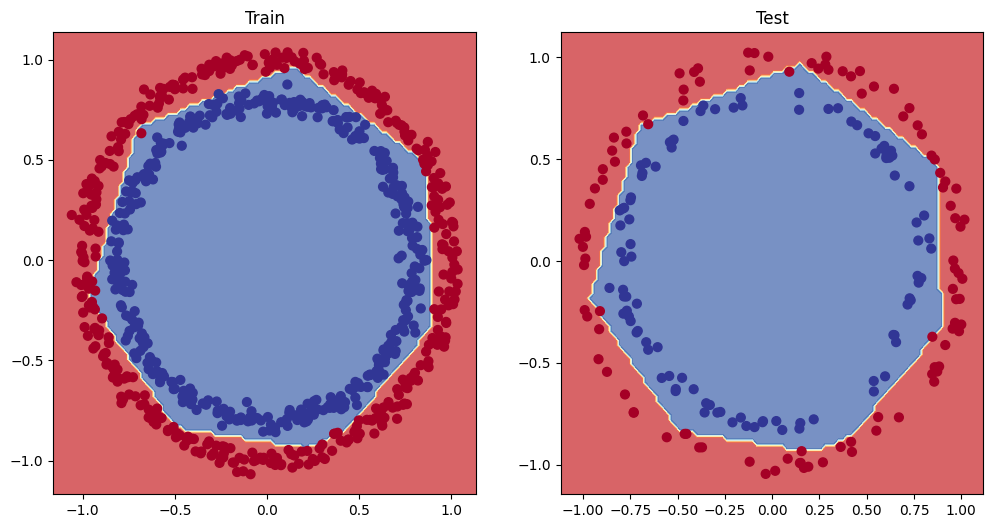

In [62]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

## More classification evaluation metrics

Alongside visualizing our model results as much as possible, there are a handful of other classification methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [63]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9800
Model loss on the test set: 0.06556978076696396
Model accuracy on the test set: 98.00%


How about a confusion matrix?

In [65]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
# Make predictions
y_preds = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [66]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [67]:
y_preds[:10]

array([[0.99400157],
       [0.9990787 ],
       [0.97099656],
       [0.98054177],
       [0.05337256],
       [0.00741653],
       [0.9791401 ],
       [0.00328834],
       [0.9867027 ],
       [0.33208787]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [68]:
# Convert our predictions probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [69]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [ 0, 99]], dtype=int64)

How about we prettify confusion matrix?

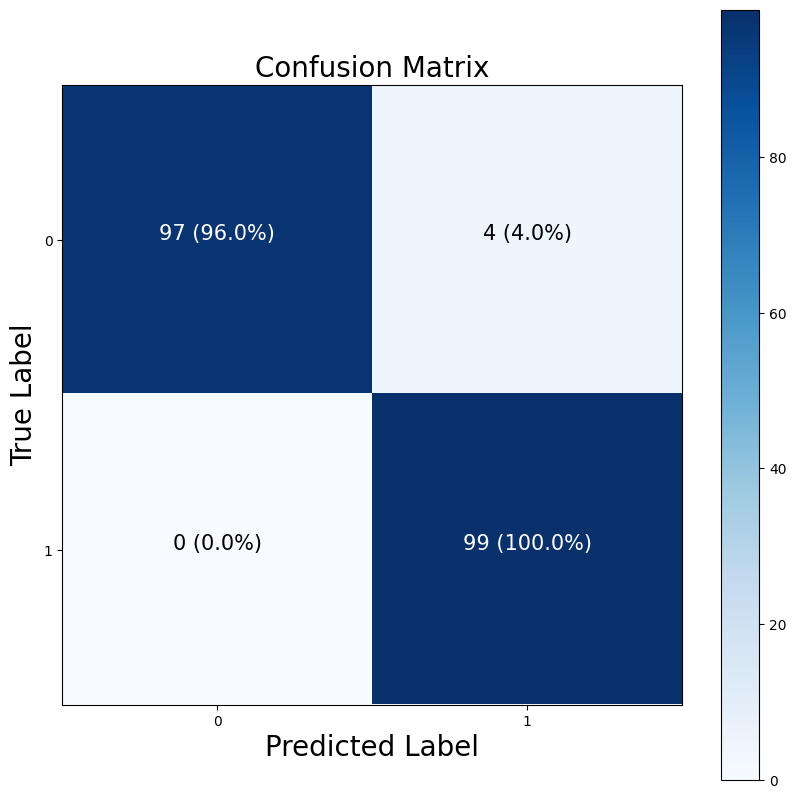

In [73]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it 
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)